In [ ]:
%%capture
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!bash Miniconda3-latest-Linux-x86_64.sh -bfp /usr/local

#1. Загрузка генома

In [ ]:
# GCA_964271285.1 (A.halleri)
!wget -O hall.fna.gz https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/964/271/285/GCA_964271285.1_ddAraHall_1.3/GCA_964271285.1_ddAraHall_1.3_genomic.fna.gz

--2024-11-14 13:26:27--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/964/271/285/GCA_964271285.1_ddAraHall_1.3/GCA_964271285.1_ddAraHall_1.3_genomic.fna.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.11, 130.14.250.12, 130.14.250.13, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64279520 (61M) [application/x-gzip]
Saving to: ‘hall.fna.gz’

hall.fna.gz         100%[===================>]  61.30M  15.7MB/s    in 4.5s    

2024-11-14 13:26:33 (13.7 MB/s) - ‘hall.fna.gz’ saved [64279520/64279520]



In [ ]:
!gunzip hall.fna.gz

#2. Установка repeatmasker
- repeatmasker уже запустили на сервере и получили итоговый файл: hall_2_up.fna.align


In [ ]:
!conda create -n rm

Channels:
 - defaults
Platform: linux-64
Solving environment: / done

## Package Plan ##

  environment location: /usr/local/envs/rm



Proceed ([y]/n)? y

Preparing transaction: \ done
Verifying transaction: / done
Executing transaction: \ done
#
# To activate this environment, use
#
#     $ conda activate rm
#
# To deactivate an active environment, use
#
#     $ conda deactivate



In [ ]:
!source activate rm && conda install -c conda-forge -c bioconda repeatmodeler

Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: - \ | / done

## Package Plan ##

  environment location: /usr/local/envs/rm

  added / updated specs:
    - repeatmodeler


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |            2_gnu          23 KB  conda-forge
    biopython-1.84             |  py312h9a8786e_0         3.3 MB  conda-forge
    blast-2.16.0               |       hc155240_2       143.0 MB  bioconda
    bzip2-1.0.8                |       h4bc722e_7         247 KB  conda-forge
    c-ares-1.34.3              |       heb4867d_0         201 KB  conda-forge
    ca-certificates-2024.8.30  |       hbcca054_0         155 KB  conda-forge
    cached-property-1.5.2      |       hd8ed1ab_1           4 KB  conda-forge
    cached_pr

In [ ]:
!source activate rm

In [ ]:
!!source activate rm && RepeatMasker -lib hall_2_up.fna.align -a -dir Masker2 -pa 4 -s -xsmall hall.fna

['RepeatMasker version 4.1.7-p1',
 'Search Engine: NCBI/RMBLAST [ 2.14.1+ ]',
 'Using Custom Repeat Library: hall_2_up.fna.align',
 '',
 'Building general libraries in: /usr/local/envs/rm/share/RepeatMasker/Libraries//general',
 '',
 'analyzing file hall.fna',
 '',
 'Checking for E. coli insertion elements',
 '',
 'Checking for E. coli insertion elements',
 '',
 'Checking for E. coli insertion elements',
 '',
 'Checking for E. coli insertion elements',
 'identifying Simple Repeats in batch 3 of 3967',
 'identifying Simple Repeats in batch 2 of 3967',
 'identifying Simple Repeats in batch 1 of 3967',
 'identifying Simple Repeats in batch 4 of 3967',
 'identifying matches to hall_2_up.fna.align sequences in batch 3 of 3967',
 'NCBIBlastSearchEngine::search: Error...compressed subject database (/content/RM_12919.ThuNov141336052024/hall_2_up.fna.align) does not exist!',
 ' at /usr/local/envs/rm/bin/RepeatMasker line 2063.',
 'identifying matches to hall_2_up.fna.align sequences in batch 2 

In [ ]:
!conda create -n rmasker

Channels:
 - defaults
Platform: linux-64
Solving environment: / done

## Package Plan ##

  environment location: /usr/local/envs/rmasker



Proceed ([y]/n)? н
Invalid choice: н
Proceed ([y]/n)? y

Preparing transaction: \ done
Verifying transaction: / done
Executing transaction: \ done
#
# To activate this environment, use
#
#     $ conda activate rmasker
#
# To deactivate an active environment, use
#
#     $ conda deactivate



In [ ]:
!source activate rmasker && conda install -c conda-forge -c bioconda repeatmasker

Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: - \ | / done

## Package Plan ##

  environment location: /usr/local/envs/rmasker

  added / updated specs:
    - repeatmasker


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    h5py-3.12.1                |nompi_py313hff19e9a_102         1.3 MB  conda-forge
    libmpdec-4.0.0             |       h4bc722e_0          88 KB  conda-forge
    numpy-2.1.3                |  py313h4bf6692_0         8.0 MB  conda-forge
    pip-24.3.1                 |     pyh145f28c_0         1.2 MB  conda-forge
    python-3.13.0              |hf623796_100_cp313        36.0 MB
    python_abi-3.13            |          5_cp313           6 KB  conda-forge
    sqlite-3.46.0              |       h6d4b2fc_0         840 KB  conda-forge
    ------------------------------------------------------------
                         

In [ ]:
!source activate rmasker && calcDivergenceFromAlign.pl -s divsum /content/Masker2/hall.fna.align

Can't locate RepeatMaskerConfig.pm in @INC (you may need to install the RepeatMaskerConfig module) (@INC contains: /usr/local/envs/rmasker/bin/.. /usr/local/envs/rmasker/share/RepeatMasker/util /home/rhubley/projects/RepeatMasker /usr/local/envs/rmasker/lib/perl5/5.32/site_perl /usr/local/envs/rmasker/lib/perl5/site_perl /usr/local/envs/rmasker/lib/perl5/5.32/vendor_perl /usr/local/envs/rmasker/lib/perl5/vendor_perl /usr/local/envs/rmasker/lib/perl5/5.32/core_perl /usr/local/envs/rmasker/lib/perl5/core_perl .) at /usr/local/envs/rmasker/bin/calcDivergenceFromAlign.pl line 118.
BEGIN failed--compilation aborted at /usr/local/envs/rmasker/bin/calcDivergenceFromAlign.pl line 118.


In [ ]:
!ls /usr/local/envs/rmasker/share/RepeatMasker RepeatMaskerConfig.pm

ls: cannot access 'RepeatMaskerConfig.pm': No such file or directory
/usr/local/envs/rmasker/share/RepeatMasker:
addRepBase.pl		   FastaDB.pm		      RepbaseRecord.pm
ArrayListIterator.pm	   HMMERSearchEngine.pm       RepeatMasker
ArrayList.pm		   HTMLAnnotHeader.html       RepeatMaskerConfig.pm
bluegrad.jpg		   INSTALL		      repeatmasker.help
build_env_setup.sh	   Libraries		      RepeatProteinMask
conda_build.sh		   LibraryUtils.pm	      RepeatRecord.pm
configure		   LICENSE		      SearchEngineI.pm
CrossmatchSearchEngine.pm  Matrices		      SearchResultCollection.pm
daterepeats.help	   Matrix.pm		      SearchResult.pm
DFAM.pm			   metadata_conda_debug.yaml  SeqDBI.pm
DFAMRecord.pm		   NCBIBlastSearchEngine.pm   SimpleBatcher.pm
DupMasker		   NCBIBlastXSearchEngine.pm  Taxonomy.pm
EMBL.pm			   ProcessRepeats	      TRF.pm
famdb_classes.py	   PRSearchResult.pm	      TRFResult.pm
famdb_globals.py	   PubRef.pm		      TRFSearchResult.pm
famdb_helper_classes.py    README.md		      util
famd

In [ ]:
!cp /usr/local/envs/rmasker/share/RepeatMasker/*.pm /usr/local/envs/rmasker/lib/perl5/site_perl

In [ ]:
!source activate rmasker && calcDivergenceFromAlign.pl -s divsum /content/hall_2_up.fna.align


===
=== Error: Missing alignment file parameter!
===
/usr/local/envs/rmasker/share/RepeatMasker/util/calcDivergenceFromAlign.pl - 4.1.7-p1

NAME
    calcDivergenceFromAlign.pl - Recalculate/Summarize the divergences in an
    align file.

SYNOPSIS
      calcDivergenceFromAlign.pl [-version] [-s <summary_file>] [-noCpGMod]
                                 [-a <new_align_file>] 
                                 *.align[.gz]

      Typical use case: generate *.divsum file for createRepeatLandscape.pl
      
           ./calcDivergenceFromAlign.pl -s mygenome.divsum  mygenome.fa.align.gz

      Note: The "-a" parameter is only necessary if you want to save the
            per-alignment divergence values in addition to the family summaries.

DESCRIPTION
      A utility script to calculate a new divergence measure on the
      RM alignment files.  Currently RepeatMasker only calculates the
      standard Kimura 2-Parameter divergence metric for the *.align file. 

      The new divergence m

# 3. Построение графика





In [21]:
!source activate rmasker && createRepeatLandscape.pl -div divsum -g 227207528 > divsum.html

Parsing divsum


In [22]:
!head divsum


Jukes/Cantor and Kimura subsitution levels adjusted for CpG sites
File: /content/hall_2_up.fna.align
Weighted average Kimura divergence for each repeat family
Class	Repeat	absLen	wellCharLen	Kimura%
-----	------	------	-----------	-------
DNA/CMC-EnSpm	rnd-1_family-296	632	630	30.26
DNA/CMC-EnSpm	rnd-1_family-394	1169	1142	31.58
DNA/CMC-EnSpm	rnd-1_family-470	76	76	32.62
DNA/CMC-EnSpm	rnd-4_family-2017	112	108	13.54


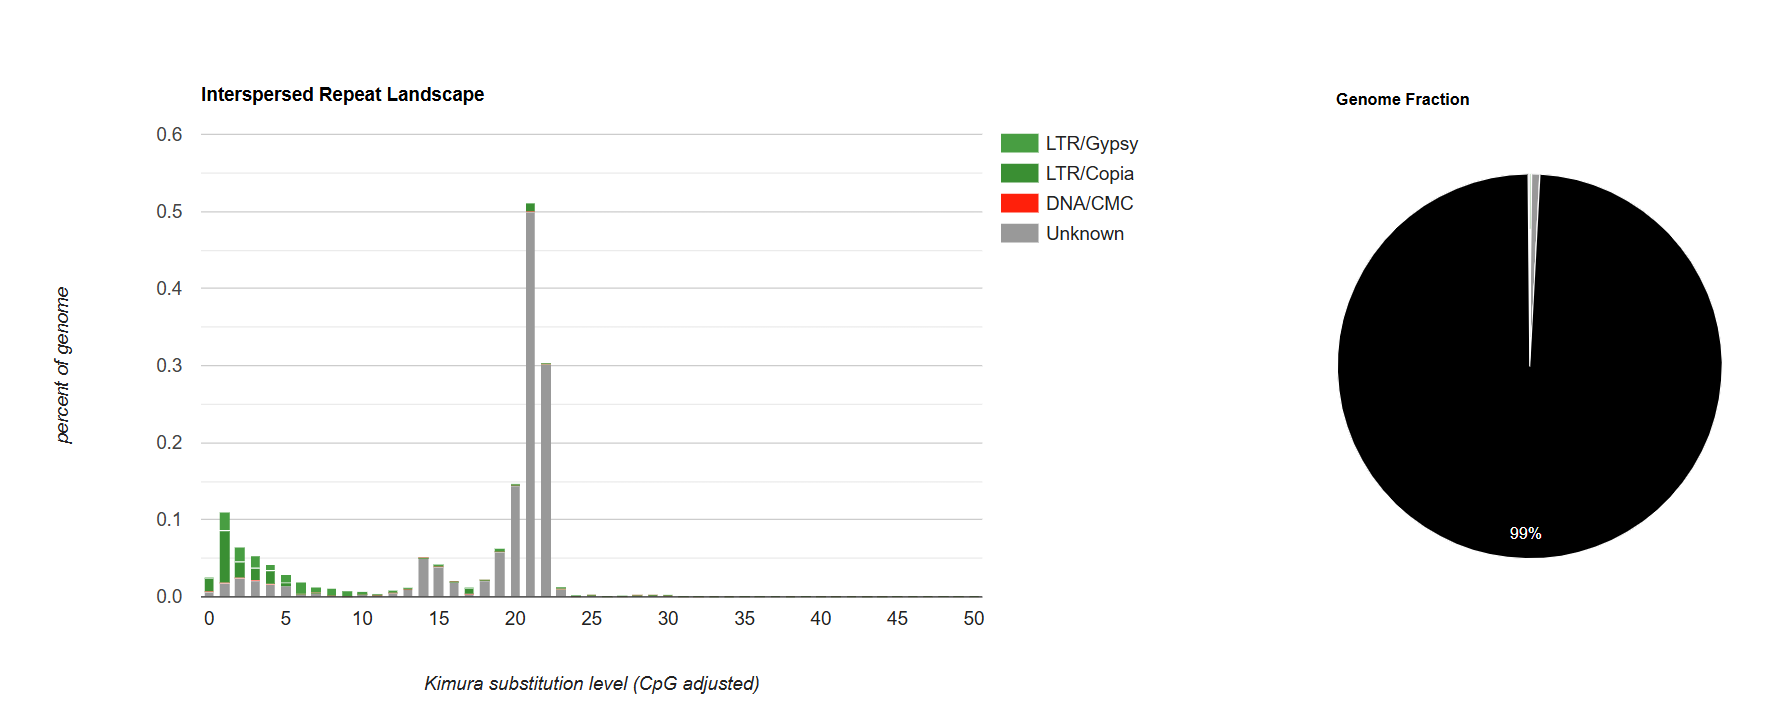